In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
# Irisデータセットを読み込む
iris = load_iris()
data = iris.data
# １、３列目を抽出
X = data[:100, [0, 2]]
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [4]:
import matplotlib.pyplot as plt

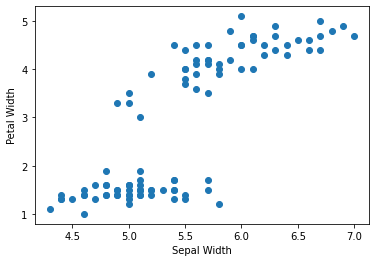

In [5]:
# 散布図を描画
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [8]:
# クラスタ数を３とするKMeansのインスタンスを生成
km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)
# KMeansを実行
y_km = km.fit_predict(X)

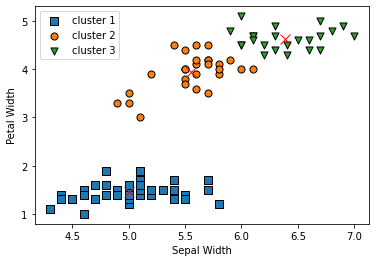

In [10]:
fig, ax = plt.subplots()
# 散布図（クラスタ１）
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50,
          edgecolor='black', marker='s', label='cluster 1')
# クラスタ中心（クラスタ１）
ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]),
       marker='x', markersize=10, color='red')

# 散布図（クラスタ2）
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50,
          edgecolor='black', marker='o', label='cluster 2')
# クラスタ中心（クラスタ2)
ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]),
       marker='x', markersize=10, color='red')

# 散布図（クラスタ3）
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50,
          edgecolor='black', marker='v', label='cluster 3')
# クラスタ中心（クラスタ3)
ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]),
       marker='x', markersize=10, color='red')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
# 凝集型の階層的クラスタリングのインスタンスを生成
ac = AgglomerativeClustering(n_clusters=3,
                            affinity='euclidean', linkage='complete')
# クラスタリングを実行し、各クラスのクラスタ番号を取得
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

In [13]:
from scipy.cluster.hierarchy import dendrogram

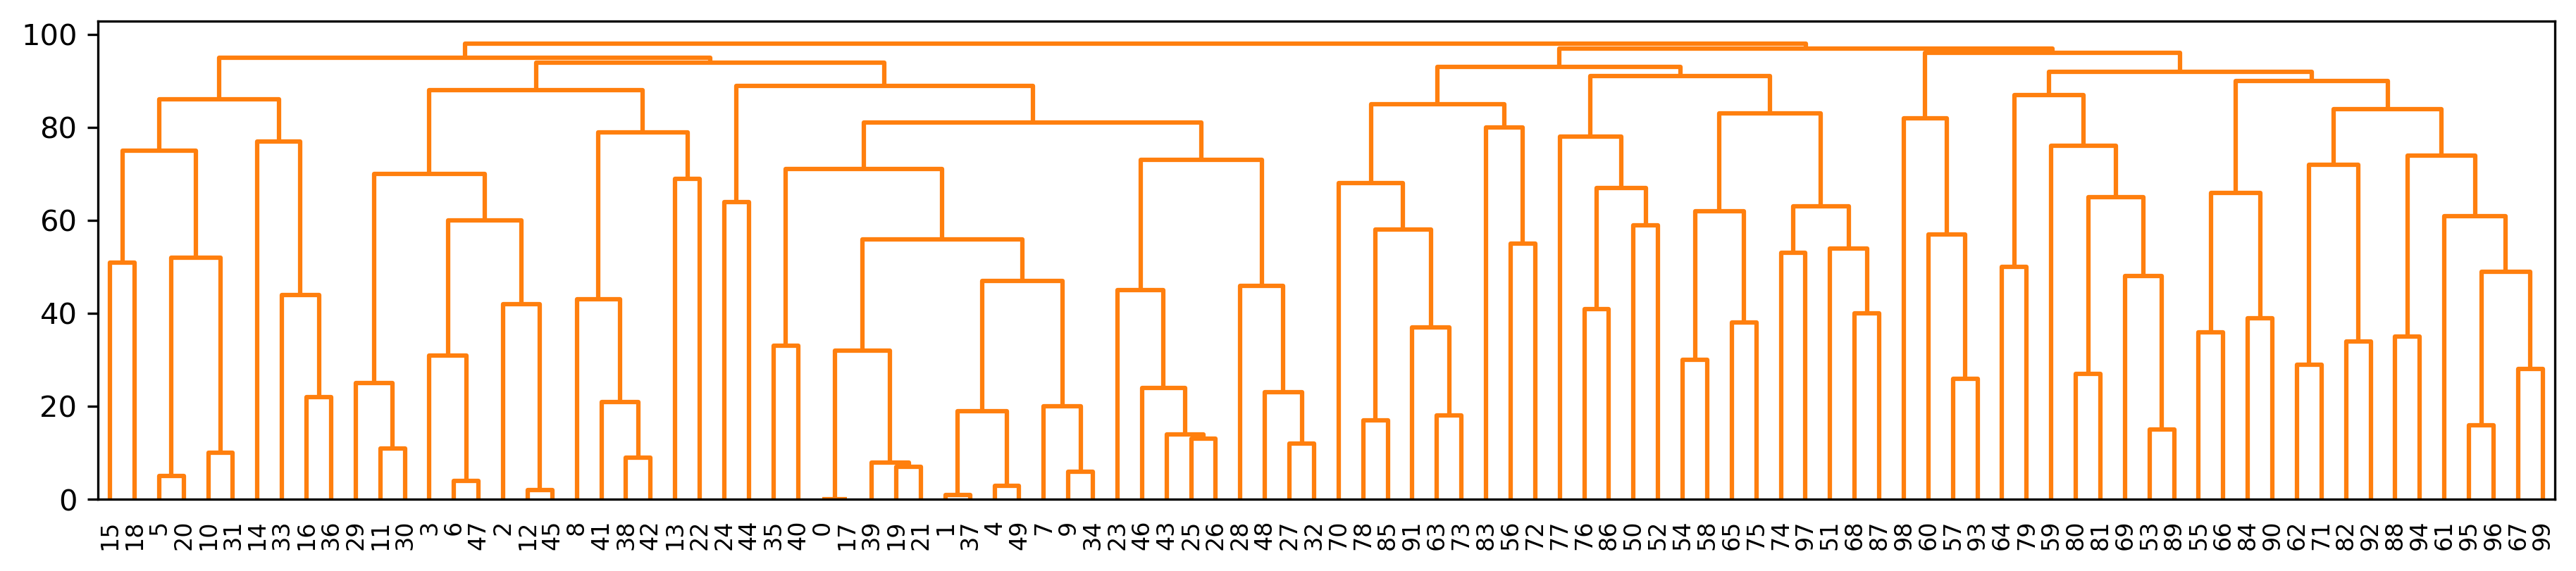

In [17]:
# 子クラスタとの関係を抽出
children = ac.children_
# クラスタ間の距離を抽出
distance = np.arange(children.shape[0])
# 各データの観測番号
np_of_observations = np.arange(2, children.shape[0] + 2)

# 子クラスタ、クラスタ間の距離、観測番号を列番号を結合
linkage_matrix = np.hstack((children,
                           distance[:, np.newaxis],
                           np_of_observations[:, np.newaxis])).astype(float)

# 樹形図をプロット
fig, ax = plt.subplots(figsize=(15, 3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100),
          leaf_font_size=8, color_threshold=np.inf)
plt.show()